#### Exploratory Data Analysis (EDA)

Dataset: 
- _customers_clean.csv_
- _inventory_clean.csv_
- _products_clean.csv_
- _salesforce_clean.csv_
- _suppliers_clean.csv_
- _transactions_clean.csv_

Author: Luis Sergio Pastrana Lemus  
Date: 2025-07-06

# Exploratory Data Analysis – Grocery Store Dataset

## __1. Libraries__.

In [1]:
from pathlib import Path
import sys

# Define project root dynamically, gets the current directory from which the notebook belongs and moves one level upper
project_root = Path.cwd().parent

# Add src to sys.path if it is not already
if str(project_root) not in sys.path:

    sys.path.append(str(project_root))

# Import function directly (more controlled than import *)
from src import *


from IPython.display import display, HTML
import os
import pandas as pd

## __2. Path to Data file__.

In [2]:
# Build route to data file and upload
data_file_path = project_root / "data" / "processed" / "clean"

df_customers_clean = load_dataset_from_csv(data_file_path, "customers_clean.csv", header='infer', parse_dates=['join_date'])
df_inventory_clean = load_dataset_from_csv(data_file_path, "inventory_clean.csv", header='infer', parse_dates=['date'])
df_products_clean = load_dataset_from_csv(data_file_path, "products_clean.csv", header='infer')
df_salesforce_clean = load_dataset_from_csv(data_file_path, "salesforce_clean.csv", header='infer')
df_suppliers_clean = load_dataset_from_csv(data_file_path, "suppliers_clean.csv", header='infer')
df_transactions_clean = load_dataset_from_csv(data_file_path, "transactions_clean.csv", header='infer', parse_dates=['date'])

# data_file_path = project_root / "data" / "processed" / "feature"

# df_xxx_feature = load_dataset_from_csv(data_file_path, "xxx_feature.csv", sep=',', header='infer')

In [3]:
# Format notebook output
format_notebook()

## __3. Exploratory Data Analysis__.

### 3.0 Casting Data types.

In [4]:
# Call casting dtypes function from features.py and Identifying correctly missing values qith pd.NA

# missing values to pd.NA
df_inventory_clean = replace_missing_values(df_inventory_clean, include=['warehouse_location'])
df_customers_clean = replace_missing_values(df_customers_clean, include=['segment'])

# object to string
df_products_clean = cast_datatypes(df_products_clean, 'string', c_include=['product_name', 'brand'])
df_suppliers_clean = cast_datatypes(df_suppliers_clean, 'string', c_include=['supplier_name', 'contact_info'])
df_customers_clean = cast_datatypes(df_customers_clean, 'string', c_include=['customer_name'])
df_salesforce_clean = cast_datatypes(df_salesforce_clean, 'string', c_include=['employee_name'])

# object to numeric
df_products_clean = cast_datatypes(df_products_clean, 'numeric', numeric_type='Float64', c_include=['unit_cost'])
df_customers_clean = cast_datatypes(df_customers_clean, 'numeric', numeric_type="Float64", c_include=['total_spent'])

# object to category
df_products_clean = cast_datatypes(df_products_clean, 'category', c_include=['category', 'status'])
df_inventory_clean = cast_datatypes(df_inventory_clean, 'category', c_include=['warehouse_location'])
df_customers_clean = cast_datatypes(df_customers_clean, 'category', c_include=['segment'])
df_salesforce_clean = cast_datatypes(df_salesforce_clean, 'category', c_include=['region'])

# object to datetime
df_inventory_clean['date'] = pd.to_datetime(df_inventory_clean['date'], errors='coerce', utc=True)
df_customers_clean['join_date'] = pd.to_datetime(df_customers_clean['join_date'], errors='coerce', utc=True)
df_transactions_clean['date'] = pd.to_datetime(df_transactions_clean['date'], errors='coerce', utc=True)

In [5]:
df_customers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5009 entries, 0 to 5008
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   customer_id    5009 non-null   int64              
 1   customer_name  5009 non-null   string             
 2   join_date      5009 non-null   datetime64[ns, UTC]
 3   total_spent    5009 non-null   Float64            
 4   frequency      5009 non-null   int64              
 5   segment        4858 non-null   category           
dtypes: Float64(1), category(1), datetime64[ns, UTC](1), int64(2), string(1)
memory usage: 205.7 KB


In [6]:
df_inventory_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20056 entries, 0 to 20055
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   inventory_id        20056 non-null  int64              
 1   date                20056 non-null  datetime64[ns, UTC]
 2   product_id          20056 non-null  int64              
 3   beginning_stock     20056 non-null  int64              
 4   received            20056 non-null  int64              
 5   sold                20056 non-null  int64              
 6   warehouse_location  19759 non-null  category           
 7   ending_stock        20056 non-null  int64              
dtypes: category(1), datetime64[ns, UTC](1), int64(6)
memory usage: 1.1 MB


In [7]:
df_products_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10055 entries, 0 to 10054
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   product_id    10055 non-null  int64   
 1   product_name  10055 non-null  string  
 2   category      10055 non-null  category
 3   supplier_id   10055 non-null  int64   
 4   unit_cost     10055 non-null  Float64 
 5   status        10055 non-null  category
 6   brand         10055 non-null  string  
 7   list_price    10055 non-null  float64 
dtypes: Float64(1), category(2), float64(1), int64(2), string(2)
memory usage: 501.3 KB


In [8]:
df_salesforce_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2006 entries, 0 to 2005
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   employee_id    2006 non-null   int64   
 1   employee_name  2006 non-null   string  
 2   region         2006 non-null   category
 3   total_sales    2006 non-null   float64 
 4   effectiveness  2006 non-null   float64 
dtypes: category(1), float64(2), int64(1), string(1)
memory usage: 65.0 KB


In [9]:
df_suppliers_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   supplier_id     2000 non-null   int64  
 1   supplier_name   2000 non-null   string 
 2   lead_time_days  2000 non-null   int64  
 3   contact_info    2000 non-null   string 
 4   rating          2000 non-null   float64
dtypes: float64(1), int64(2), string(2)
memory usage: 78.3 KB


In [10]:
df_transactions_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20031 entries, 0 to 20030
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype              
---  ------          --------------  -----              
 0   transaction_id  20031 non-null  int64              
 1   date            20031 non-null  datetime64[ns, UTC]
 2   product_id      20031 non-null  int64              
 3   units_sold      20031 non-null  int64              
 4   customer_id     20031 non-null  int64              
 5   employee_id     20031 non-null  int64              
 6   list_price      20031 non-null  float64            
 7   sales_amount    20031 non-null  float64            
dtypes: datetime64[ns, UTC](1), float64(2), int64(5)
memory usage: 1.2 MB


### 3.1  Descriptive Statistics.

#### 3.1.1 Descriptive statistics for Original datasets.

In [11]:
# Descriptive statistics for df_customers_clean dataset
df_customers_clean.describe(include='all')

,customer_id,customer_name,join_date,total_spent,frequency,segment
count,5009.000000,5009,5009,5009.0,5009.000000,4858
unique,NaN,4839,NaN,<NA>,NaN,3
top,NaN,stephanie_smith,NaN,<NA>,NaN,occasional
freq,NaN,5,NaN,<NA>,NaN,1670
mean,2501.349770,NaN,2024-07-05 16:23:17.165102848+00:00,2465.722923,24.565782,NaN
min,1.000000,NaN,2023-07-07 07:00:00+00:00,0.0,0.000000,NaN
25%,1252.000000,NaN,2024-01-04 08:00:00+00:00,1182.67,12.000000,NaN
50%,2502.000000,NaN,2024-07-07 07:00:00+00:00,2453.37,24.000000,NaN
75%,3751.000000,NaN,2025-01-04 08:00:00+00:00,3722.34,37.000000,NaN
max,5000.000000,NaN,2025-07-06 07:00:00+00:00,4998.81,49.000000,NaN


In [12]:
# Descriptive statistics for df_inventory_clean dataset
df_inventory_clean.describe(include='all')

,inventory_id,date,product_id,beginning_stock,received,sold,warehouse_location,ending_stock
count,20056.000000,20056,20056.000000,20056.000000,20056.000000,20056.000000,19759,20056.00000
unique,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,East,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,5029,NaN
mean,10000.669376,2025-06-06 18:37:44.539290112+00:00,4999.319356,53.128041,9.452184,6.990128,NaN,52.26411
min,1.000000,2025-05-08 07:00:00+00:00,2.000000,0.000000,0.000000,0.000000,NaN,0.00000
25%,4995.750000,2025-05-23 07:00:00+00:00,2506.000000,25.000000,4.000000,3.000000,NaN,27.00000
50%,10001.500000,2025-06-07 07:00:00+00:00,4992.500000,50.000000,9.000000,7.000000,NaN,52.00000
75%,15002.250000,2025-06-21 07:00:00+00:00,7467.250000,76.000000,15.000000,11.000000,NaN,77.00000
max,20000.000000,2025-07-06 07:00:00+00:00,10000.000000,891.000000,19.000000,14.000000,NaN,118.00000


In [13]:
# Descriptive statistics for df_products_clean dataset
df_products_clean.describe(include='all')

,product_id,product_name,category,supplier_id,unit_cost,status,brand,list_price
count,10055.000000,10055,10055,10055.000000,10055.0,10055,10055,10055.000000
unique,NaN,4735,6,NaN,<NA>,3,8241,NaN
top,NaN,guess_frozen_foods,snacks,NaN,<NA>,discontinued,unknown,NaN
freq,NaN,8,1742,NaN,<NA>,3371,502,NaN
mean,5001.179015,NaN,NaN,995.408851,12.188515,NaN,NaN,16.491157
std,2886.218493,NaN,NaN,576.675100,27.685233,NaN,NaN,17.985426
min,1.000000,NaN,NaN,1.000000,0.5,NaN,NaN,0.249144
25%,2503.500000,NaN,NaN,497.000000,5.465,NaN,NaN,7.650000
50%,5002.000000,NaN,NaN,993.000000,10.415,NaN,NaN,15.110000
75%,7501.500000,NaN,NaN,1485.000000,15.175,NaN,NaN,22.430000


In [14]:
# Descriptive statistics for df_salesforce_clean dataset
df_salesforce_clean.describe(include='all')

,employee_id,employee_name,region,total_sales,effectiveness
count,2006.000000,2006,2006,2006.000000,2006.000000
unique,NaN,1972,4,NaN,NaN
top,NaN,michelle_brown,South,NaN,NaN
freq,NaN,3,537,NaN,NaN
mean,1000.535892,NaN,NaN,55732.060904,0.767125
std,577.859662,NaN,NaN,29207.401757,0.124908
min,1.000000,NaN,NaN,10106.100000,0.014067
25%,501.250000,NaN,NaN,32457.225000,0.690000
50%,999.500000,NaN,NaN,54423.780000,0.770000
75%,1500.750000,NaN,NaN,77539.127500,0.860000


In [15]:
# Descriptive statistics for df_suppliers_clean dataset
df_suppliers_clean.describe(include='all')

,supplier_id,supplier_name,lead_time_days,contact_info,rating
count,2000.000000,2000,2000.000000,2000,2000.000000
unique,NaN,1899,NaN,2000,NaN
top,NaN,smith_plc,NaN,365-261-6825,NaN
freq,NaN,6,NaN,1,NaN
mean,1000.500000,NaN,8.027000,NaN,3.989455
std,577.494589,NaN,3.731653,NaN,0.575057
min,1.000000,NaN,2.000000,NaN,3.000000
25%,500.750000,NaN,5.000000,NaN,3.480000
50%,1000.500000,NaN,8.000000,NaN,4.000000
75%,1500.250000,NaN,11.000000,NaN,4.470000


In [16]:
# Descriptive statistics for df_transactions_clean dataset
df_transactions_clean.describe(include='all')

,transaction_id,date,product_id,units_sold,customer_id,employee_id,list_price,sales_amount
count,20031.000000,20031,20031.000000,20031.000000,20031.000000,20031.000000,20031.000000,20031.000000
mean,9997.236084,2024-07-05 16:30:09.794818304+00:00,4996.029355,5.134591,2502.250412,1005.256253,15.405775,87.748790
min,1.000000,2023-07-07 07:00:00+00:00,1.000000,1.000000,1.000000,1.000000,0.620000,0.670000
25%,4995.500000,2024-01-06 08:00:00+00:00,2498.000000,3.000000,1250.000000,511.000000,7.870000,25.390000
50%,9994.000000,2024-07-04 07:00:00+00:00,5021.000000,5.000000,2504.000000,1006.000000,15.310000,60.000000
75%,14997.500000,2025-01-04 20:00:00+00:00,7495.500000,7.000000,3738.000000,1505.000000,22.420000,116.090000
max,20000.000000,2025-07-06 07:00:00+00:00,9999.000000,28.000000,5000.000000,2000.000000,35.760000,4168.800000
std,5773.561815,NaN,2892.213300,3.001474,1446.752962,578.213070,8.713478,157.430072


#### 3.1.2 Descriptive statistics for customers_clean dataset, quantitive values.

<table>
  <thead>
    <tr>
      <th>CV (%)</th>
      <th>Interpretation for Coefficient of Variation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><small><strong>0–10%</strong></small></td>
      <td><small><strong>Very low</strong> variability → <strong>very reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>10–20%</strong></small></td>
      <td><small><strong>Moderate</strong> variability → <strong>reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>20–30%</strong></small></td>
      <td><small><strong>Considerable</strong> variability → <strong>some what skewed</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>>30%</strong></small></td>
      <td><small>High<strong> variability</strong> → <strong>prefer</strong> Median</small></td>
    </tr>
  </tbody>
</table>


In [17]:
df_customers_clean['total_spent'].describe()

count         5009.0
mean     2465.722923
std      1447.658038
min              0.0
25%          1182.67
50%          2453.37
75%          3722.34
max          4998.81
Name: total_spent, dtype: Float64

In [18]:
df_customers_clean['frequency'].describe()

count    5009.000000
mean       24.565782
std        14.281868
min         0.000000
25%        12.000000
50%        24.000000
75%        37.000000
max        49.000000
Name: frequency, dtype: float64

In [19]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_customers_clean, 'total_spent')

In [20]:
evaluate_central_trend(df_customers_clean, 'frequency')

In [21]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_customers_clean, 'total_spent', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [customer_id, customer_name, join_date, total_spent, frequency, segment]
 Index: [],
 Empty DataFrame
 Columns: [customer_id, customer_name, join_date, total_spent, frequency, segment]
 Index: [])

In [22]:
outlier_limit_bounds(df_customers_clean, 'frequency', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [customer_id, customer_name, join_date, total_spent, frequency, segment]
 Index: [],
 Empty DataFrame
 Columns: [customer_id, customer_name, join_date, total_spent, frequency, segment]
 Index: [])

c:\Users\luisp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5009.
  res = hypotest_fun_out(*samples, **kwds)


Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.9505,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,5855.4890,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,62.7635,Crit: 0.7860,Reject H₀ (Not Normal),All sample sizes,Tail behavior


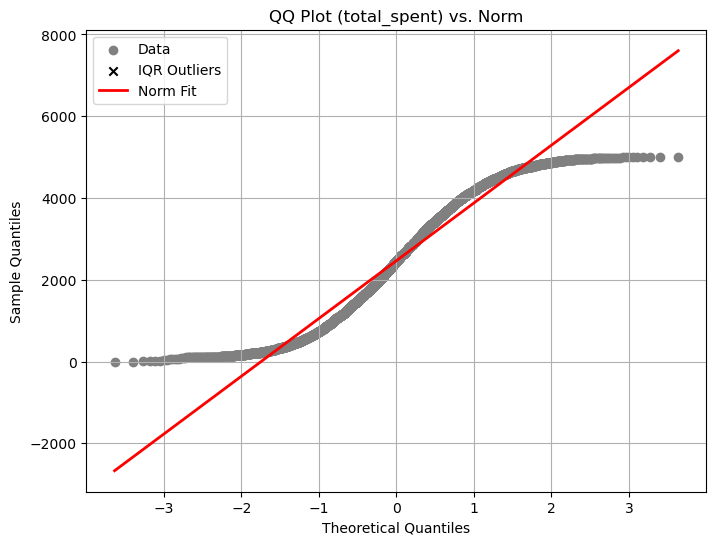

In [23]:
# Show data distribution with detailed statistical info
plot_qq_normality_tests(df_customers_clean, 'total_spent')

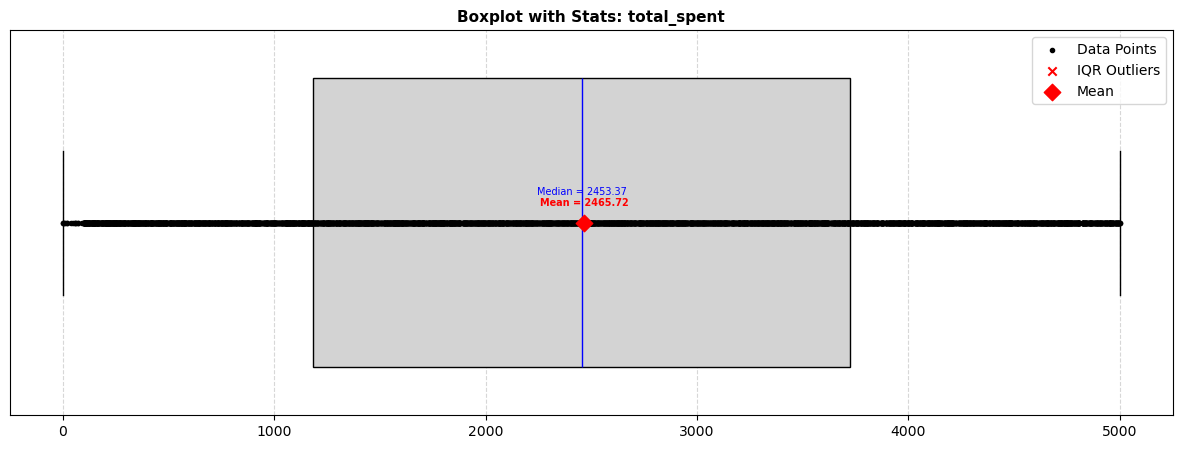

In [24]:
plot_horizontal_boxplot(df_customers_clean, 'total_spent')

c:\Users\luisp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 5009.
  res = hypotest_fun_out(*samples, **kwds)


Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.9529,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,4597.1036,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,59.4822,Crit: 0.7860,Reject H₀ (Not Normal),All sample sizes,Tail behavior


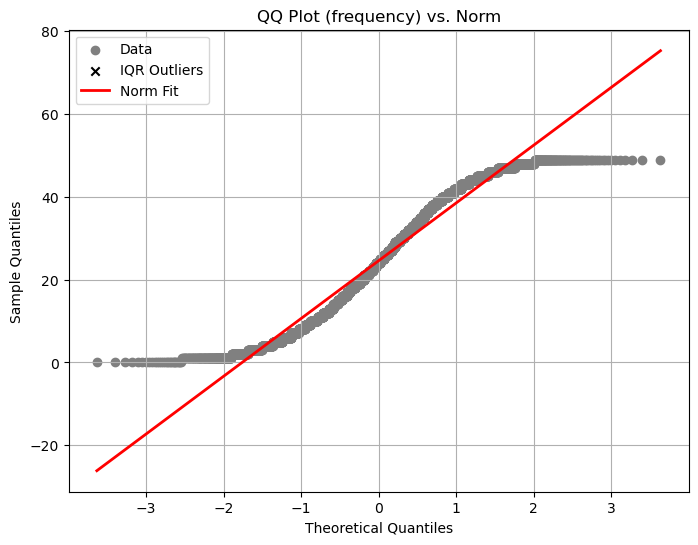

In [25]:
plot_qq_normality_tests(df_customers_clean, 'frequency')

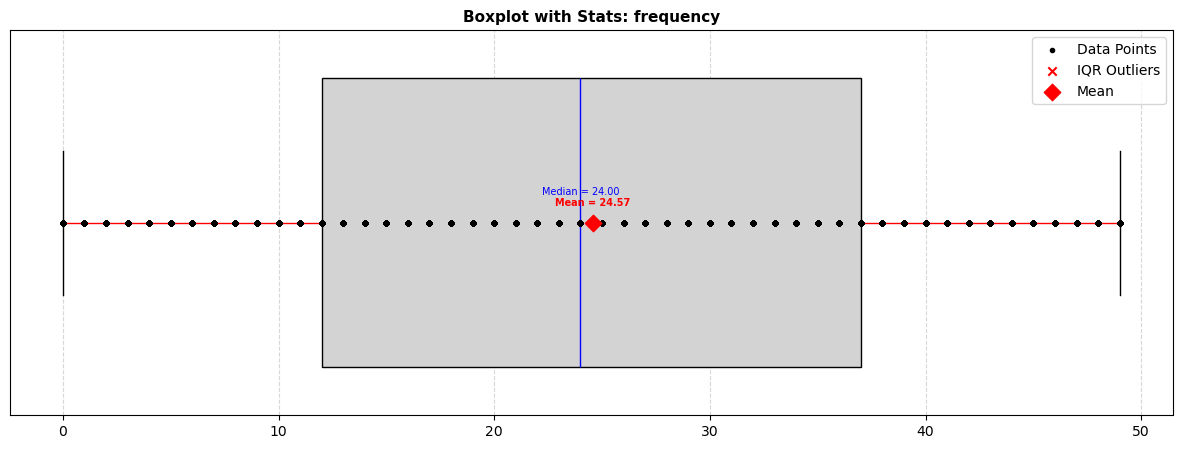

In [26]:
plot_horizontal_boxplot(df_customers_clean, 'frequency')

#### 3.1.3 Descriptive statistics for inventory_clean dataset, quantitive values.

<table>
  <thead>
    <tr>
      <th>CV (%)</th>
      <th>Interpretation for Coefficient of Variation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><small><strong>0–10%</strong></small></td>
      <td><small><strong>Very low</strong> variability → <strong>very reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>10–20%</strong></small></td>
      <td><small><strong>Moderate</strong> variability → <strong>reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>20–30%</strong></small></td>
      <td><small><strong>Considerable</strong> variability → <strong>some what skewed</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>>30%</strong></small></td>
      <td><small>High<strong> variability</strong> → <strong>prefer</strong> Median</small></td>
    </tr>
  </tbody>
</table>


In [27]:
df_inventory_clean['beginning_stock'].describe()

count    20056.000000
mean        53.128041
std         48.568777
min          0.000000
25%         25.000000
50%         50.000000
75%         76.000000
max        891.000000
Name: beginning_stock, dtype: float64

In [28]:
df_inventory_clean['received'].describe()

count    20056.000000
mean         9.452184
std          5.792954
min          0.000000
25%          4.000000
50%          9.000000
75%         15.000000
max         19.000000
Name: received, dtype: float64

In [29]:
df_inventory_clean['sold'].describe()

count    20056.000000
mean         6.990128
std          4.317354
min          0.000000
25%          3.000000
50%          7.000000
75%         11.000000
max         14.000000
Name: sold, dtype: float64

In [30]:
df_inventory_clean['ending_stock'].describe()

count    20056.00000
mean        52.26411
std         29.64830
min          0.00000
25%         27.00000
50%         52.00000
75%         77.00000
max        118.00000
Name: ending_stock, dtype: float64

In [31]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_inventory_clean, 'beginning_stock')

In [32]:
evaluate_central_trend(df_inventory_clean, 'received')

In [33]:
evaluate_central_trend(df_inventory_clean, 'sold')

In [34]:
evaluate_central_trend(df_inventory_clean, 'ending_stock')

In [35]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_inventory_clean, 'beginning_stock', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [inventory_id, date, product_id, beginning_stock, received, sold, warehouse_location, ending_stock]
 Index: [],
        inventory_id                      date  product_id  beginning_stock  received  sold warehouse_location  ending_stock
 65               66 2025-05-26 07:00:00+00:00        6690              370         2     8              South            68
 259             260 2025-07-05 07:00:00+00:00        2066              160        19     7               East            44
 428             429 2025-05-26 07:00:00+00:00        5948              168         4     7               West            21
 498             499 2025-06-25 07:00:00+00:00        3688              184        15     8               East            30
 532             533 2025-06-28 07:00:00+00:00         608              470         6     6              North            94
 ...             ...                       ...         ...              ...       ...   ...                ... 

In [36]:
outlier_limit_bounds(df_inventory_clean, 'received', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [inventory_id, date, product_id, beginning_stock, received, sold, warehouse_location, ending_stock]
 Index: [],
 Empty DataFrame
 Columns: [inventory_id, date, product_id, beginning_stock, received, sold, warehouse_location, ending_stock]
 Index: [])

In [37]:
outlier_limit_bounds(df_inventory_clean, 'sold', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [inventory_id, date, product_id, beginning_stock, received, sold, warehouse_location, ending_stock]
 Index: [],
 Empty DataFrame
 Columns: [inventory_id, date, product_id, beginning_stock, received, sold, warehouse_location, ending_stock]
 Index: [])

In [38]:
outlier_limit_bounds(df_inventory_clean, 'ending_stock', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [inventory_id, date, product_id, beginning_stock, received, sold, warehouse_location, ending_stock]
 Index: [],
 Empty DataFrame
 Columns: [inventory_id, date, product_id, beginning_stock, received, sold, warehouse_location, ending_stock]
 Index: [])

c:\Users\luisp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20056.
  res = hypotest_fun_out(*samples, **kwds)


Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.5757,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,25499.1696,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,885.7244,Crit: 0.7870,Reject H₀ (Not Normal),All sample sizes,Tail behavior


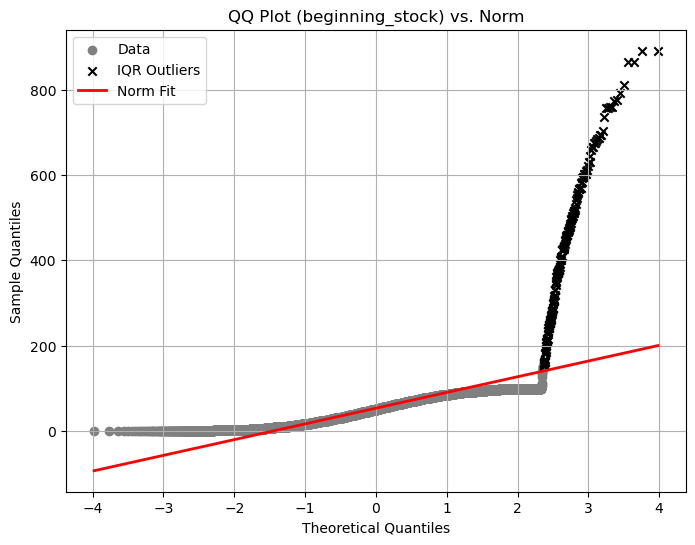

In [40]:
# Show data distribution with detailed statistical info
plot_qq_normality_tests(df_inventory_clean, 'beginning_stock')

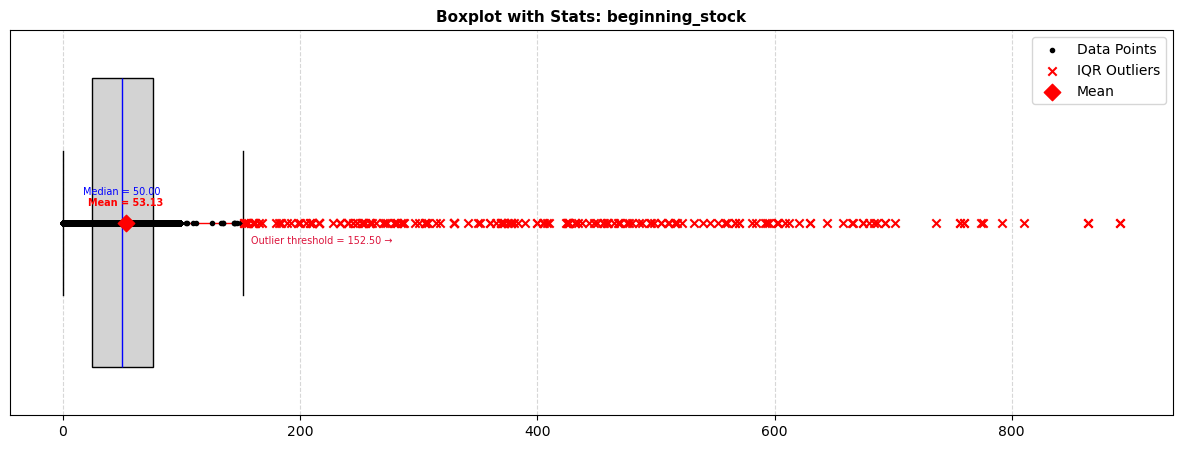

In [41]:
plot_horizontal_boxplot(df_inventory_clean, 'beginning_stock')

c:\Users\luisp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20056.
  res = hypotest_fun_out(*samples, **kwds)


Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.9484,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,19956.7946,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,259.2348,Crit: 0.7870,Reject H₀ (Not Normal),All sample sizes,Tail behavior


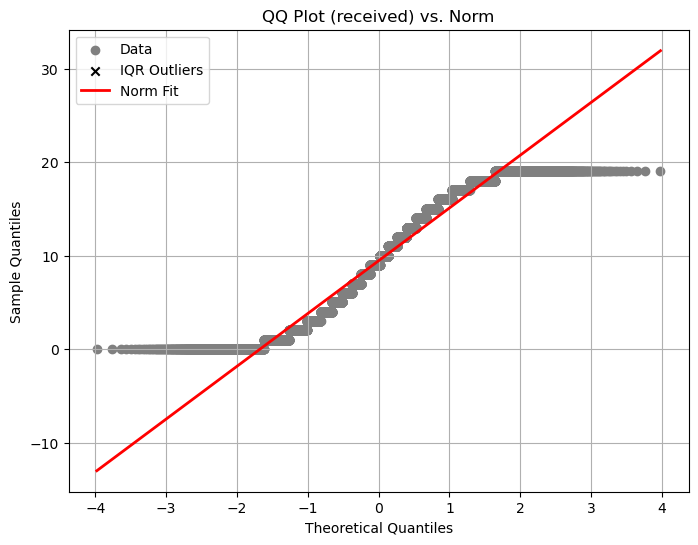

In [43]:
plot_qq_normality_tests(df_inventory_clean, 'received')


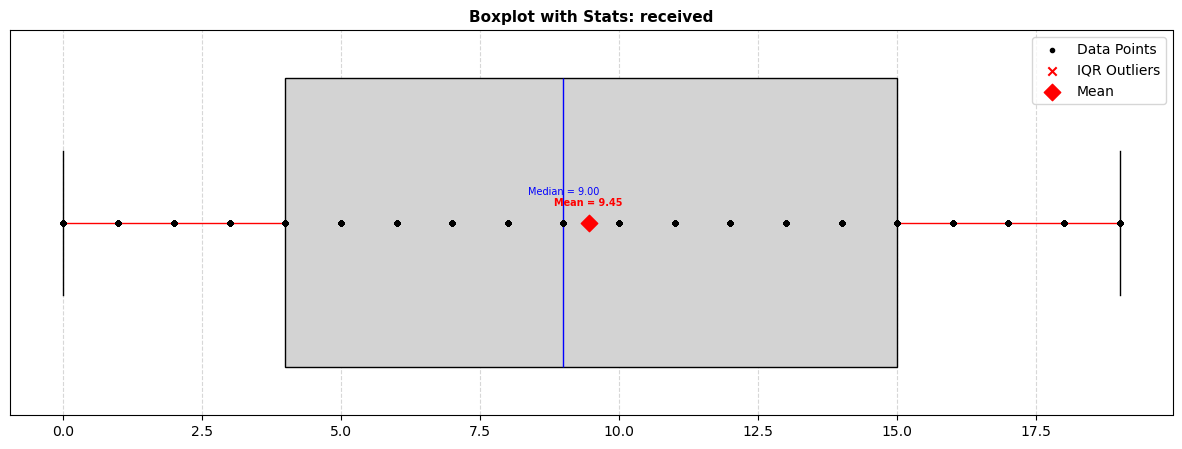

In [44]:
plot_horizontal_boxplot(df_inventory_clean, 'received')

c:\Users\luisp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20056.
  res = hypotest_fun_out(*samples, **kwds)


Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.9455,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,19976.5322,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,279.5168,Crit: 0.7870,Reject H₀ (Not Normal),All sample sizes,Tail behavior


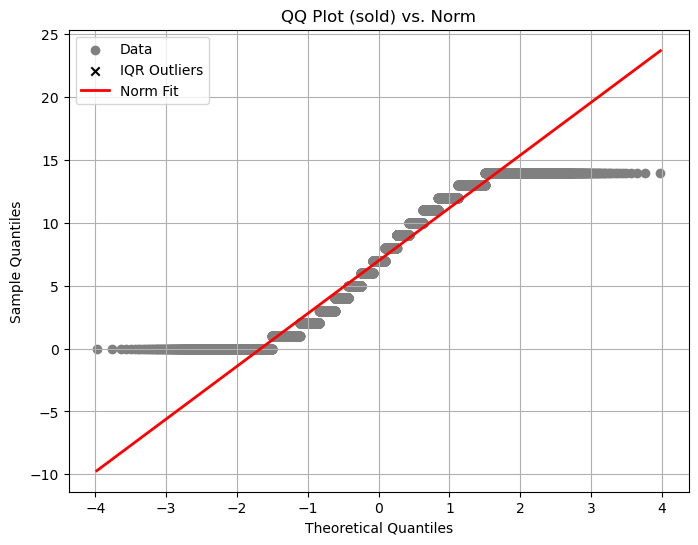

In [45]:
plot_qq_normality_tests(df_inventory_clean, 'sold')

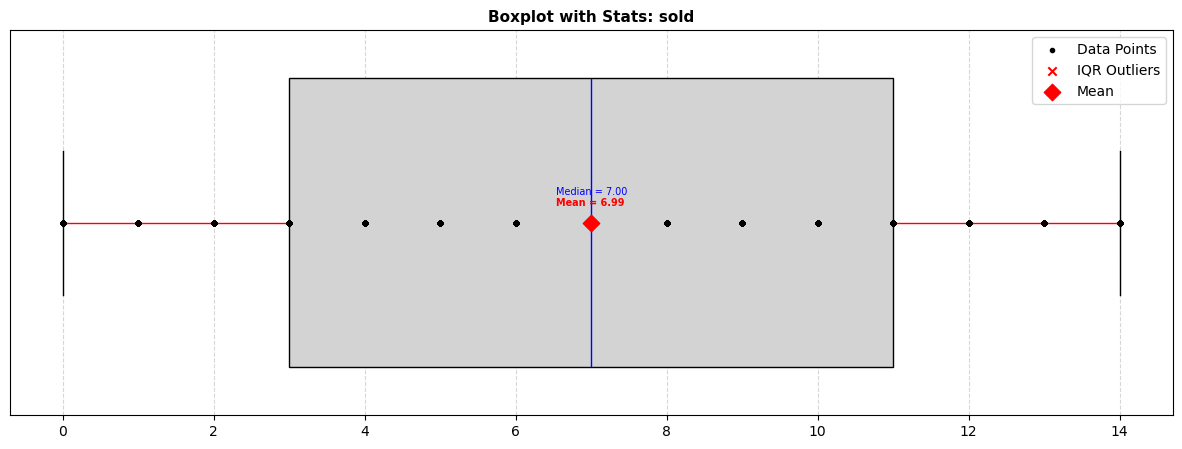

In [46]:
plot_horizontal_boxplot(df_inventory_clean, 'sold')

c:\Users\luisp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 20056.
  res = hypotest_fun_out(*samples, **kwds)


Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.9677,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,7743.8692,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,161.1141,Crit: 0.7870,Reject H₀ (Not Normal),All sample sizes,Tail behavior


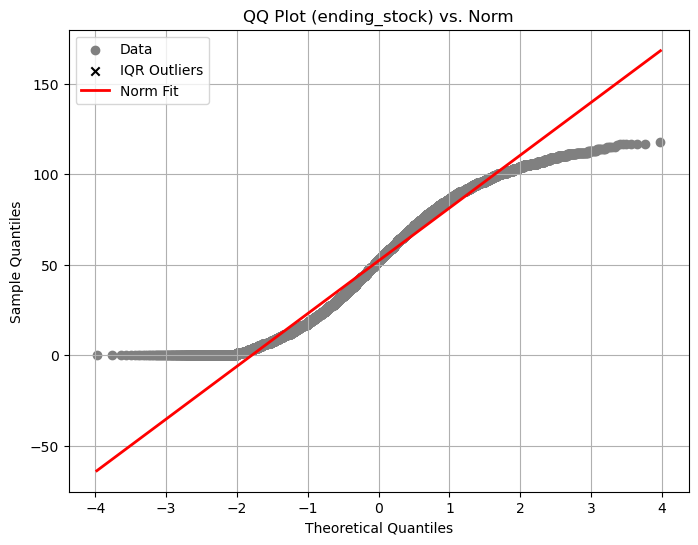

In [47]:
plot_qq_normality_tests(df_inventory_clean, 'ending_stock')

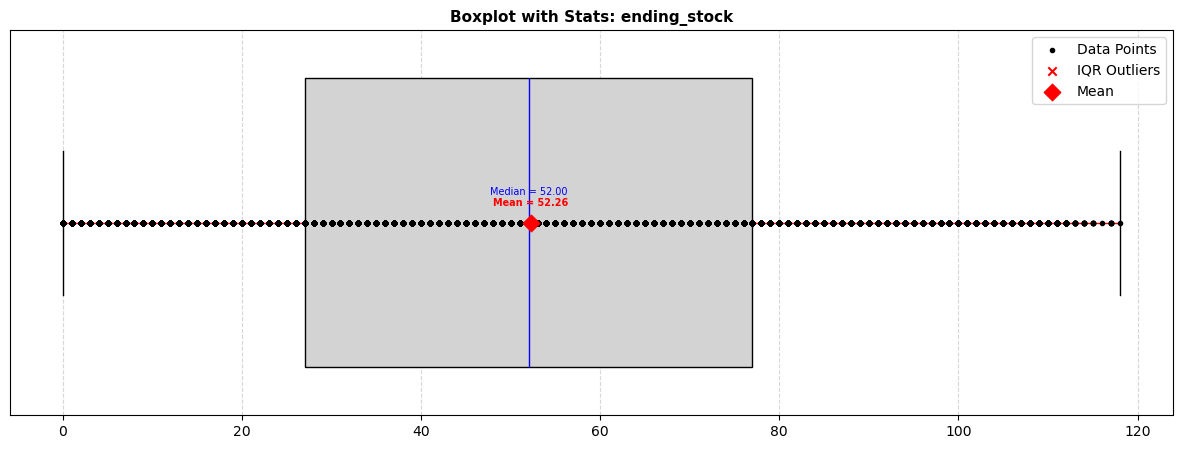

In [48]:
plot_horizontal_boxplot(df_inventory_clean, 'ending_stock')

#### 3.1.4 Descriptive statistics for products_clean dataset, quantitive values.

<table>
  <thead>
    <tr>
      <th>CV (%)</th>
      <th>Interpretation for Coefficient of Variation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><small><strong>0–10%</strong></small></td>
      <td><small><strong>Very low</strong> variability → <strong>very reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>10–20%</strong></small></td>
      <td><small><strong>Moderate</strong> variability → <strong>reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>20–30%</strong></small></td>
      <td><small><strong>Considerable</strong> variability → <strong>some what skewed</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>>30%</strong></small></td>
      <td><small>High<strong> variability</strong> → <strong>prefer</strong> Median</small></td>
    </tr>
  </tbody>
</table>


In [49]:
df_products_clean['unit_cost'].describe()

count        10055.0
mean       12.188515
std        27.685233
min              0.5
25%            5.465
50%           10.415
75%           15.175
max      1927.144909
Name: unit_cost, dtype: Float64

In [50]:
df_products_clean['list_price'].describe()

count    10055.000000
mean        16.491157
std         17.985426
min          0.249144
25%          7.650000
50%         15.110000
75%         22.430000
max        347.700000
Name: list_price, dtype: float64

In [51]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_products_clean, 'unit_cost')

In [52]:
evaluate_central_trend(df_products_clean, 'list_price')

In [53]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_products_clean, 'unit_cost', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [product_id, product_name, category, supplier_id, unit_cost, status, brand, list_price]
 Index: [],
        product_id        product_name      category  supplier_id   unit_cost        status                        brand  list_price
 4               5  place_frozen_foods        bakery          964        73.3   backordered   leblanc_james_and_thompson       11.08
 135           136          sell_dairy         dairy         1145  174.768661   backordered                thomas_wilson       32.99
 138           139   free_frozen_foods        snacks         1941       145.1   backordered                  woodard_plc       18.34
 290           291      develop_bakery        bakery         1610        53.5        active           cox_rich_and_perez        6.97
 351           352   away_frozen_foods  frozen_foods          766   57.206633        active              henderson_group       12.95
 ...           ...                 ...           ...          ...         .

In [54]:
outlier_limit_bounds(df_products_clean, 'list_price', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [product_id, product_name, category, supplier_id, unit_cost, status, brand, list_price]
 Index: [],
       product_id          product_name      category  supplier_id  unit_cost        status                        brand  list_price
 327          328  century_frozen_foods         dairy          780       6.35  discontinued   wood_perkins_and_rodriguez        97.8
 461          462       attorney_snacks        snacks         1039       7.98        active   gallagher_miller_and_lewis       116.0
 639          640       bring_beverages        snacks         1436      10.41   backordered                gonzalez_hall       140.9
 645          646   situation_beverages        bakery         1961      18.28  discontinued                    novak_llc       307.1
 758          759         appear_bakery  frozen_foods          824      14.84  discontinued        smith_reid_and_waller       208.6
 ...          ...                   ...           ...          ...        .

c:\Users\luisp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10055.
  res = hypotest_fun_out(*samples, **kwds)


Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.1472,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,30791.9243,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,2124.6532,Crit: 0.7870,Reject H₀ (Not Normal),All sample sizes,Tail behavior


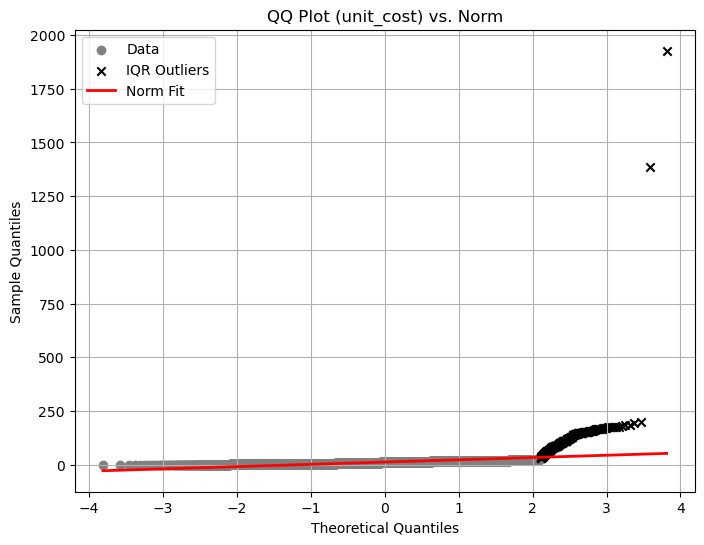

In [56]:
# Show data distribution with detailed statistical info
plot_qq_normality_tests(df_products_clean, 'unit_cost')

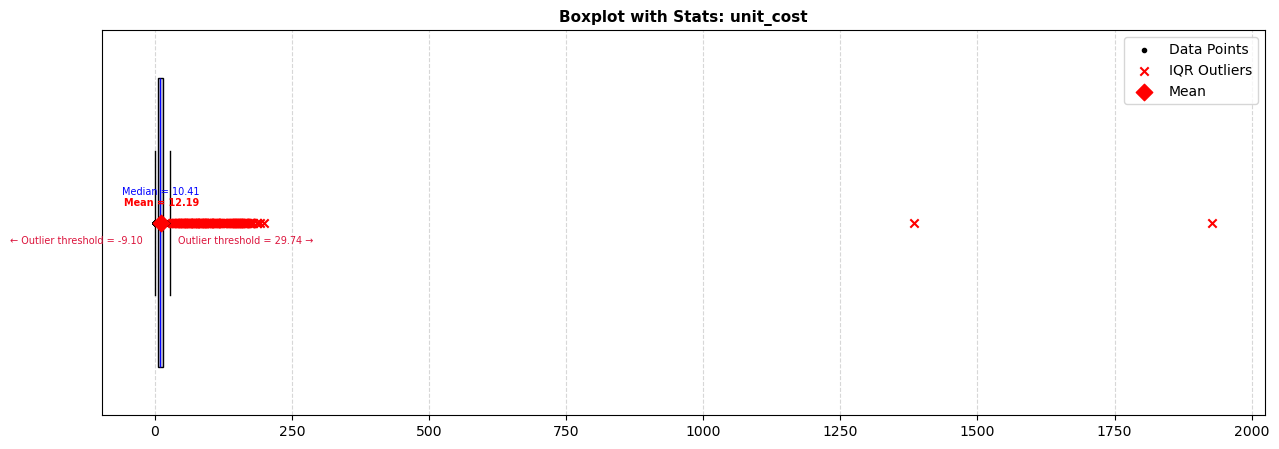

In [58]:
plot_horizontal_boxplot(df_products_clean, 'unit_cost')

c:\Users\luisp\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 10055.
  res = hypotest_fun_out(*samples, **kwds)


Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.4493,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,14941.1438,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,787.0545,Crit: 0.7870,Reject H₀ (Not Normal),All sample sizes,Tail behavior


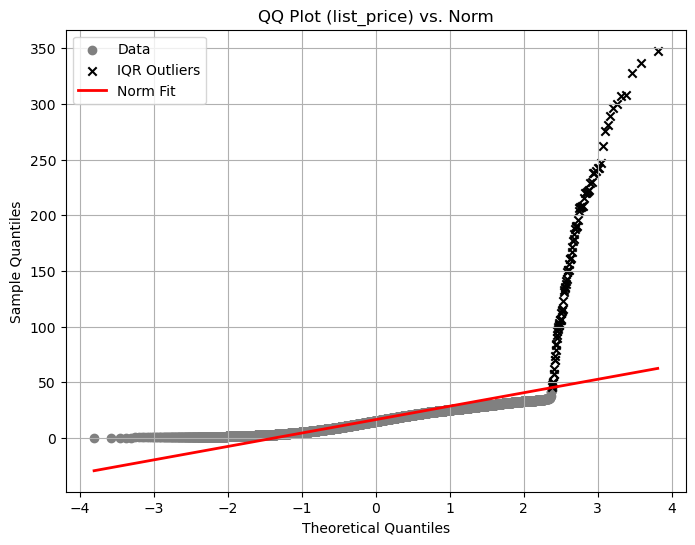

In [60]:
plot_qq_normality_tests(df_products_clean, 'list_price')

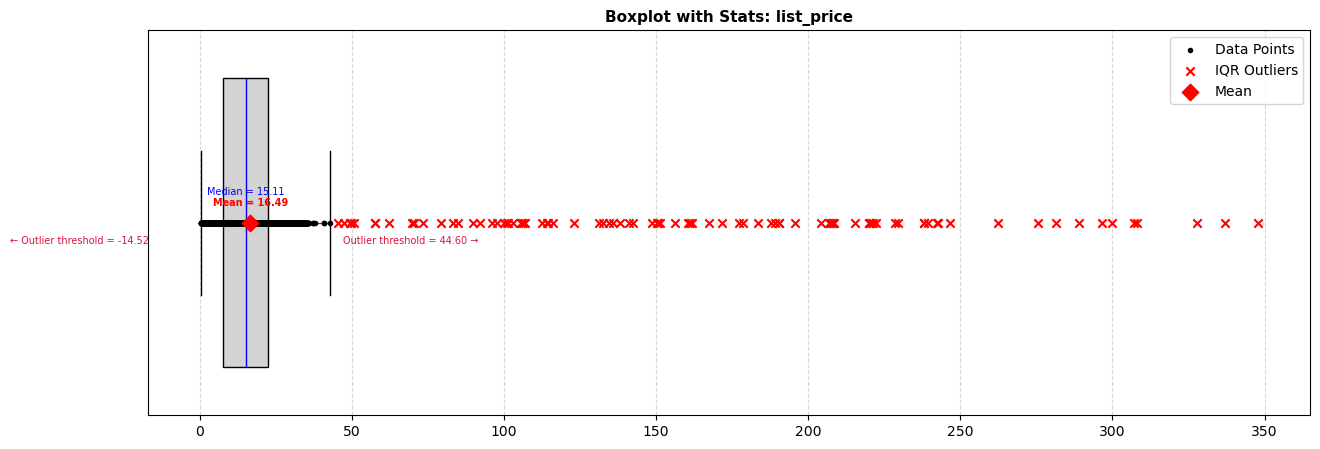

In [59]:
plot_horizontal_boxplot(df_products_clean, 'list_price')

#### 3.1.5 Descriptive statistics for salesforce_clean dataset, quantitive values.

<table>
  <thead>
    <tr>
      <th>CV (%)</th>
      <th>Interpretation for Coefficient of Variation</th>
    </tr>
  </thead>
  <tbody>
    <tr>
      <td><small><strong>0–10%</strong></small></td>
      <td><small><strong>Very low</strong> variability → <strong>very reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>10–20%</strong></small></td>
      <td><small><strong>Moderate</strong> variability → <strong>reliable</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>20–30%</strong></small></td>
      <td><small><strong>Considerable</strong> variability → <strong>some what skewed</strong> Mean</small></td>
    </tr>
    <tr>
      <td><small><strong>>30%</strong></small></td>
      <td><small>High<strong> variability</strong> → <strong>prefer</strong> Median</small></td>
    </tr>
  </tbody>
</table>


In [61]:
df_salesforce_clean['total_sales'].describe()

count      2006.000000
mean      55732.060904
std       29207.401757
min       10106.100000
25%       32457.225000
50%       54423.780000
75%       77539.127500
max      304984.182345
Name: total_sales, dtype: float64

In [62]:
df_salesforce_clean['effectiveness'].describe()

count    2006.000000
mean        0.767125
std         0.124908
min         0.014067
25%         0.690000
50%         0.770000
75%         0.860000
max         0.950000
Name: effectiveness, dtype: float64

In [63]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_salesforce_clean, 'total_sales')

In [64]:
evaluate_central_trend(df_salesforce_clean, 'effectiveness')

In [65]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_salesforce_clean, 'total_sales', bound='both', clamp_zero=False)

(Empty DataFrame
 Columns: [employee_id, employee_name, region, total_sales, effectiveness]
 Index: [],
       employee_id    employee_name region    total_sales  effectiveness
 35             36     james_gibson  North  285711.594462           0.82
 741           742   kenneth_nelson   East  244232.598425           0.71
 811           812  briana_mcdonald   East  216686.324807           0.90
 813           814   amanda_carroll  South  247344.627204           0.76
 1179         1180    jenna_pittman  South  304984.182345           0.71
 1693         1694   jennifer_ortiz   East  146798.722028           0.63
 1795         1796    keith_roberts  North  154181.172663           0.87
 1858         1859    rachel_morgan   East  254252.540722           0.81
 1906         1907    katie_preston  North  212858.232545           0.83
 1967         1968     robert_payne  South  187479.369605           0.63
 2003          632    james_meadows   East  212357.607635           0.92)

In [66]:
outlier_limit_bounds(df_salesforce_clean, 'effectiveness', bound='both', clamp_zero=True)

(      employee_id         employee_name region  total_sales  effectiveness
 7               8       mitchell_thomas   East     71050.80       0.014107
 34             35        melissa_rogers  North     27109.95       0.096224
 217           218           ryan_hansen   East     38642.52       0.033314
 270           271         susan_perkins   West     23865.54       0.053350
 431           432          janet_hansen  North     25172.49       0.014067
 596           597          toni_hoffman  South     59507.21       0.064532
 640           641          alexandra_ho   East     64863.64       0.025719
 658           659         danielle_gill   East     46156.18       0.093792
 721           722  anthony_mcconnell_jr   West     95953.31       0.052051
 739           740          joshua_hines  North     82681.33       0.099967
 1058         1059            erin_velez   West     39154.33       0.094906
 1062         1063          jordan_clark  North     94899.63       0.070419
 1159       

Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.9040,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,628.6467,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,15.6720,Crit: 0.7850,Reject H₀ (Not Normal),All sample sizes,Tail behavior


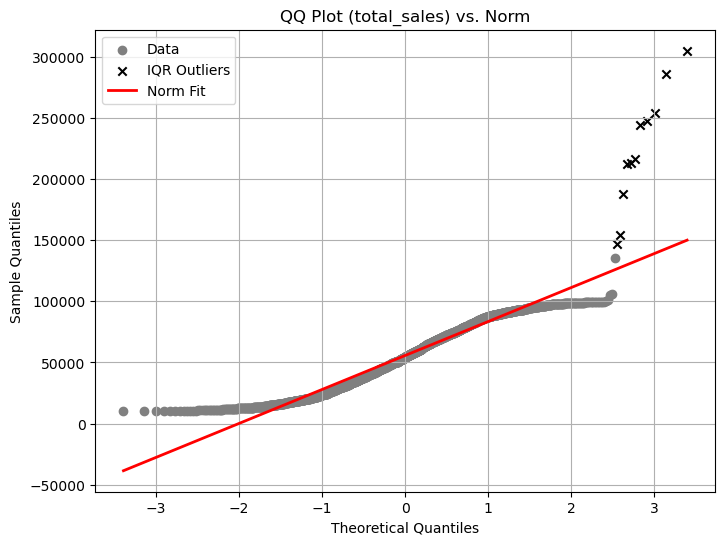

In [68]:
# Show data distribution with detailed statistical info
plot_qq_normality_tests(df_salesforce_clean, 'total_sales')

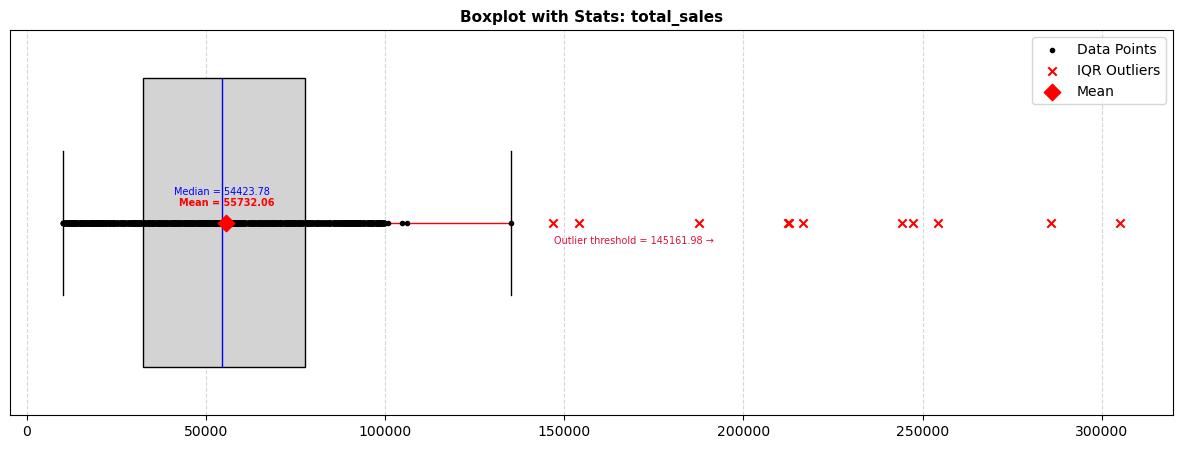

In [69]:
plot_horizontal_boxplot(df_salesforce_clean, 'total_sales')

Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.8504,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,899.8841,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,23.4783,Crit: 0.7850,Reject H₀ (Not Normal),All sample sizes,Tail behavior


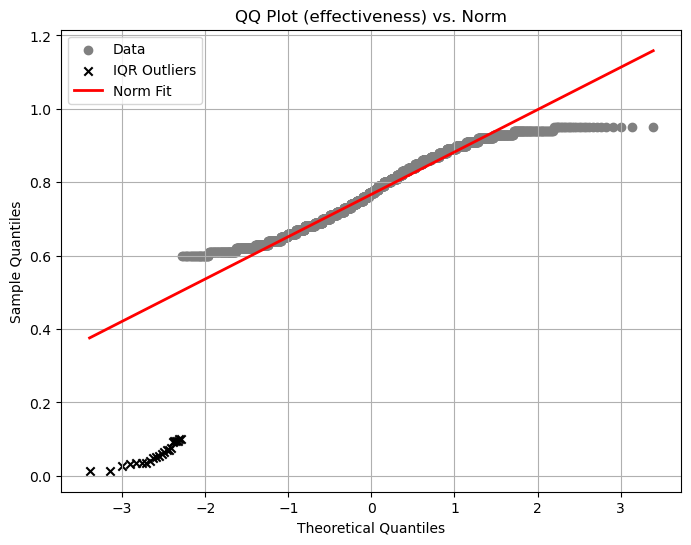

In [70]:
plot_qq_normality_tests(df_salesforce_clean, 'effectiveness')

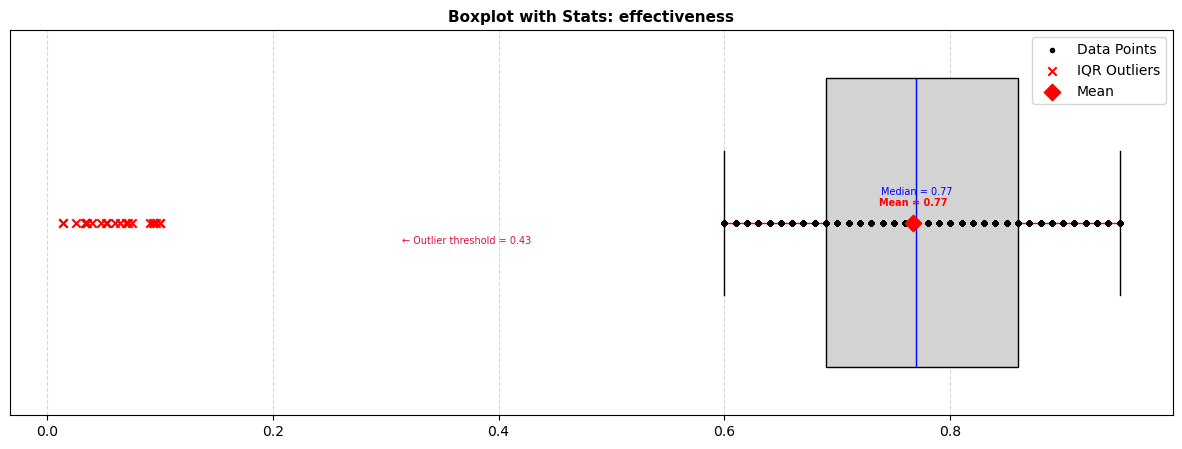

In [71]:
plot_horizontal_boxplot(df_salesforce_clean, 'effectiveness')

#### 3.1.6 Descriptive statistics for suppliers_clean dataset, quantitive values.

In [72]:
df_suppliers_clean['lead_time_days'].describe()

count    2000.000000
mean        8.027000
std         3.731653
min         2.000000
25%         5.000000
50%         8.000000
75%        11.000000
max        14.000000
Name: lead_time_days, dtype: float64

In [73]:
df_suppliers_clean['rating'].describe()

count    2000.000000
mean        3.989455
std         0.575057
min         3.000000
25%         3.480000
50%         4.000000
75%         4.470000
max         5.000000
Name: rating, dtype: float64

In [74]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_suppliers_clean, 'lead_time_days')

In [75]:
evaluate_central_trend(df_suppliers_clean, 'rating')

In [76]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_suppliers_clean, 'lead_time_days', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [supplier_id, supplier_name, lead_time_days, contact_info, rating]
 Index: [],
 Empty DataFrame
 Columns: [supplier_id, supplier_name, lead_time_days, contact_info, rating]
 Index: [])

In [77]:
outlier_limit_bounds(df_suppliers_clean, 'rating', bound='both', clamp_zero=True)

(Empty DataFrame
 Columns: [supplier_id, supplier_name, lead_time_days, contact_info, rating]
 Index: [],
 Empty DataFrame
 Columns: [supplier_id, supplier_name, lead_time_days, contact_info, rating]
 Index: [])

Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.9427,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,1823.9574,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,29.7523,Crit: 0.7850,Reject H₀ (Not Normal),All sample sizes,Tail behavior


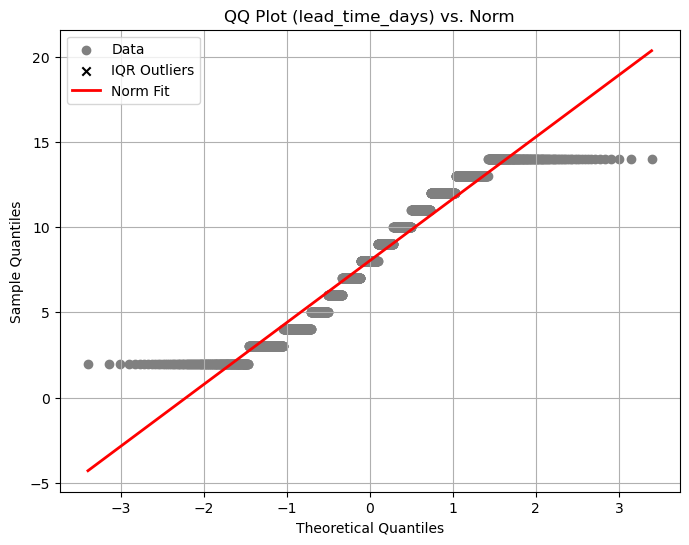

In [78]:
# Show data distribution with detailed statistical info
plot_qq_normality_tests(df_suppliers_clean, 'lead_time_days')

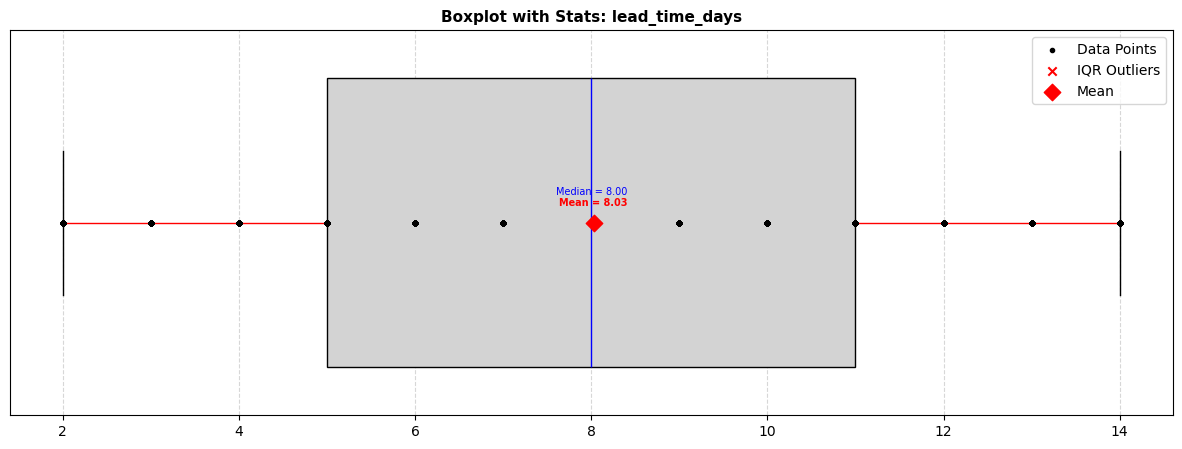

In [80]:
plot_horizontal_boxplot(df_suppliers_clean, 'lead_time_days')

Test,Statistic,p-value / Critical,Conclusion,Recommended for,Sensitive to
Shapiro-Wilk,0.9561,0.0000,Reject H₀ (Not Normal),n ≤ 5000,General deviations
D’Agostino-Pearson,1337.8403,0.0000,Reject H₀ (Not Normal),n > 500,Skewness & Kurtosis
Anderson-Darling,20.8539,Crit: 0.7850,Reject H₀ (Not Normal),All sample sizes,Tail behavior


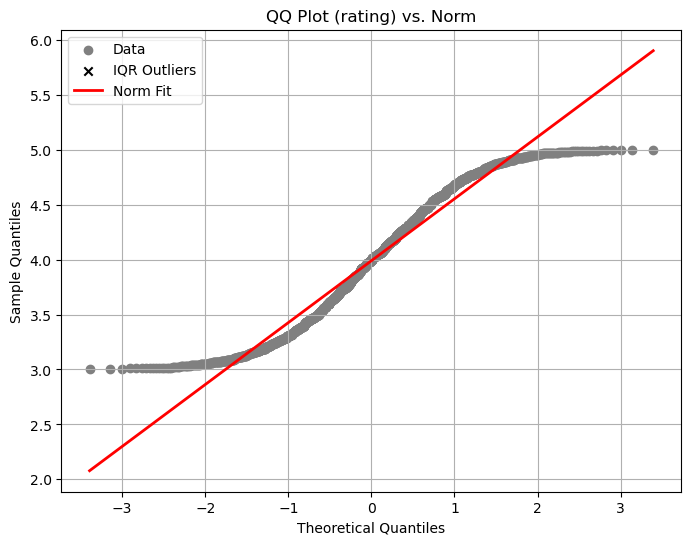

In [79]:
plot_qq_normality_tests(df_suppliers_clean, 'rating')

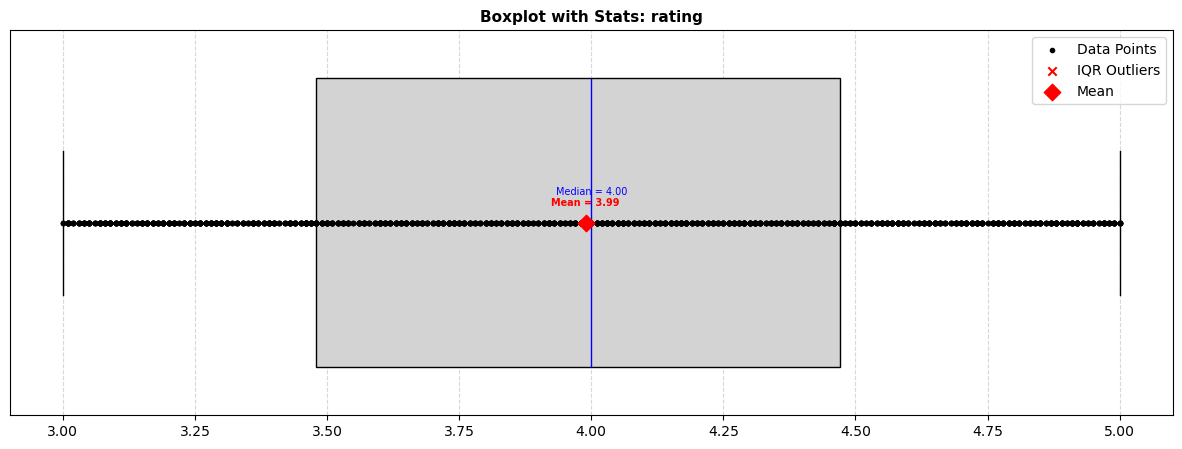

In [81]:
plot_horizontal_boxplot(df_suppliers_clean, 'rating')

#### 3.1.7 Descriptive statistics for transactions_clean dataset, quantitive values.

In [ ]:
df_transactions_clean['units_sold'].describe()

In [ ]:
df_transactions_clean['list_price'].describe()

In [ ]:
df_transactions_clean['sales_amount'].describe()

In [ ]:
# Evaluate the coefficient of variation to select the proper measure of central tendency
evaluate_central_trend(df_transactions_clean, 'units_sold')

In [ ]:
evaluate_central_trend(df_transactions_clean, 'list_price')

In [ ]:
evaluate_central_trend(df_transactions_clean, 'sales_amount')

In [ ]:
# Evaluate boundary thresholds and detect potential outliers
outlier_limit_bounds(df_transactions_clean, 'units_sold', bound='both', clamp_zero=True)

In [ ]:
outlier_limit_bounds(df_transactions_clean, 'list_price', bound='both', clamp_zero=True)

In [ ]:
outlier_limit_bounds(df_transactions_clean, 'sales_amount', bound='both', clamp_zero=True)

In [ ]:
# Show data distribution with detailed statistical info
plot_distribution_dispersion_sg5000(df_transactions_clean, 'units_sold', bins='fd')

In [ ]:
plot_distribution_dispersion_sg5000(df_transactions_clean, 'list_price', bins='fd')

In [ ]:
plot_distribution_dispersion_sg5000(df_transactions_clean, 'sales_amount', bins='fd')

### 3.2 Data Visualization: Distributions and Relationships.

#### 3.2.1 Covariance and Correlation Analysis.

##### 3.2.1.1 Covariance Matrix.

In [ ]:
# Covariance for services
df_xxx_feature[['column_name', 'column_name']].cov()

##### 3.2.1.2 Correlation Matrix.

| Correlation Value     | Interpretation                |
| --------------------- | ----------------------------- |
| `+0.7` to `+1.0`      | Strong positive correlation   |
| `+0.3` to `+0.7`      | Moderate positive correlation |
| `0.0` to `+0.3`       | Weak positive correlation     |
| `0`                   | No correlation                |
| `-0.3` to `0`         | Weak negative correlation     |
| `-0.7` to `-0.3`      | Moderate negative correlation |
| `-1.0` to `-0.7`      | Strong negative correlation   |


In [ ]:
# Correlation for services
df_xxx_feature[['column_name', 'columna_name']].corr()

In [ ]:
evaluate_correlation(df_xxx_feature)

In [ ]:
plot_scatter_matrix(df_xxx_feature[['column_name', 'column_name']])

### 3.3 Data Visualization: Data dispersion and outliers.

3.3.1 Data dispersion and outliers for ...

In [ ]:
# xxx Distribution Frequency and Frequency density
plot_frequency_density(df_xxx_feature['column_name'], bins=np.arange(min, max, step), color='grey', title='Frequency Density of name', 
                       xlabel='Name (units)', ylabel='Density', xticks_range=(min, max, step), show_kde=True, rotation=0)

In [ ]:
# xxx data dispersion
plot_boxplots(ds_list=[df_xxx_feature['column_name']], xlabels=['name'], ylabel='Values', title='Name Data dispersion', 
              yticks_range=(min, max, step), rotation=0, color=['grey'])

#### 3.4 Data visualization for ...

3.4.1 Data visalization for ...

In [ ]:
# Plots for insights

## 4. Conclusions and key insights

### 🎯 Key Findings

#### Behavioral Insights

- **XXX**: xxx 

#### Other Insights

- **XXX**: xxx 

### Final Takeaways

- **XXX**: xxx 

